In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

In [3]:
task = mnist.MNIST()
task.load_all_data(device)

In [4]:
from functools import partial

In [5]:
a = models_breed.UniformBreeder
b = partial(models_breed.UniformBreeder, breeder_swap_prob=.1)


In [6]:
b().p

0.1

In [7]:
from functools import partial

-217.49689239501953 -0.9883397781848907 -217.49689239501953


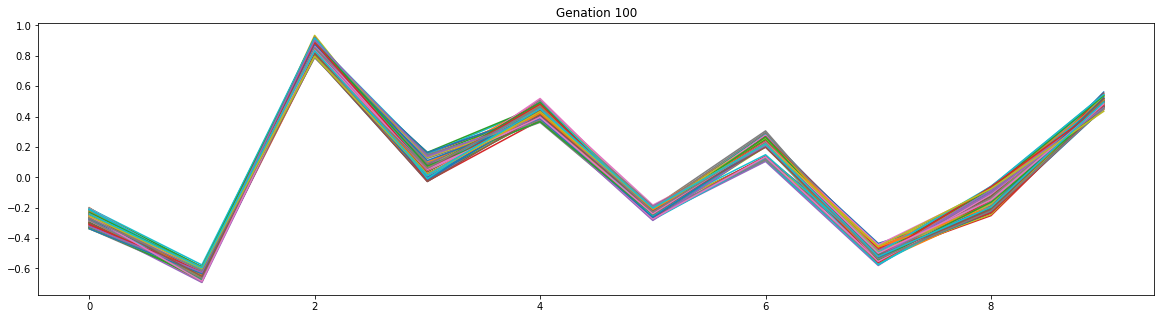

In [39]:

def calc_ipop():
    return util.to_np_obj_array([torch.randn(1000) for _ in range(100)])
def calc_clone(xs):
    return util.to_np_obj_array([x for x in xs])
def calc_crossover(xs1, xs2):
    return util.to_np_obj_array([util.uniform_crossover(a, b) for a,b in zip(xs1, xs2)])
def calc_mutate(xs):
    return util.to_np_obj_array([util.additive_noise(x, eps=1e-2) for x in xs])

calc_npop = partial(ga.calc_npop_tournament, 
                    k_elite=0, k_tournament=5, do_crossover=True)

# calc_npop = partial(ga.calc_npop_roulette, 
#                     k_elite=0, do_crossover=True,
#                     fit2prob_fn=partial(ga.fit2prob_sm, temperature=1., normalize=True))

# calc_npop = partial(ga.calc_npop_roulette, 
#                     k_elite=0, do_crossover=True,
#                     fit2prob_fn=partial(ga.fit2prob_top_K, top_k=30))

torch.manual_seed(0)
np.random.seed(0)
test = ga.SimpleGA(calc_ipop_fn=calc_ipop, calc_npop_fn=calc_npop,
                   calc_clone_fn=calc_clone, calc_mutate_fn=calc_mutate,
                   calc_crossover_fn=calc_crossover)


import time
def callback(ev):
    pop = ev.pop
    if ev.gen_idx%5==0:
        plt.figure(figsize=(20,5))
        for geno in pop:
            plt.plot(geno.numpy()[20:30])
        clear_output(wait=True)
        quality = ev.fitdata_DA['quality'].mean()
        diversity = ev.fitdata_DA['diversity'].mean()
        fitness = ev.fitdata_DA['fitness'].mean()
        print(quality, diversity, fitness)
        plt.title(f'Genation {ev.gen_idx}')
        plt.show()
        time.sleep(.5)
    
def calc_fitness(xs):
    sim = util.calc_pairwise_cossim(torch.stack(list(xs))).numpy()
    quality = np.array([-x.pow(2.).sum().item() for x in xs])
    co_diversity = -sim
    diversity = -sim.mean(axis=-1)
    fitness = quality
    fitdata = {'quality': quality, 'diversity': diversity, 'fitness': fitness}
    return util.dict_arr2arr_dict(fitdata)

test.run_evolution(100, calc_fitness, tqdm, fn_callback=callback)
    

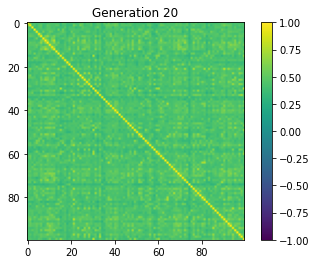

In [193]:
gen_idx = 20
popi = torch.stack(list(pop[gen_idx]))
cos = util.calc_pairwise_cossim(popi)
plt.imshow(cos, vmin=-1, vmax=1)
plt.colorbar()
plt.title(f"Generation {gen_idx}")
plt.show()

In [9]:
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print("Hello World!")

Hello World!


In [243]:
sim = util.calc_pairwise_cossim(torch.stack(list(test.pop)))

tensor([-0.2832, -0.2964, -0.3013, -0.2995, -0.3164, -0.3147, -0.3088, -0.2938,
        -0.2714, -0.3312, -0.2970, -0.3182, -0.2734, -0.3181, -0.3144, -0.2787,
        -0.2633, -0.2975, -0.3194, -0.3162, -0.2936, -0.2905, -0.3076, -0.3202,
        -0.2992, -0.3138, -0.3037, -0.3133, -0.3016, -0.3150, -0.2802, -0.2421,
        -0.2756, -0.3015, -0.3053, -0.3151, -0.3195, -0.2927, -0.2915, -0.3175,
        -0.2853, -0.2943, -0.3010, -0.3030, -0.2879, -0.2771, -0.2991, -0.2952,
        -0.3361, -0.3132, -0.3149, -0.2795, -0.2979, -0.2994, -0.3259, -0.2842,
        -0.2806, -0.3063, -0.2776, -0.3131, -0.3074, -0.3200, -0.3139, -0.2778,
        -0.3222, -0.3249, -0.3115, -0.2867, -0.3175, -0.2997, -0.3156, -0.3061,
        -0.2711, -0.3061, -0.3027, -0.3029, -0.3034, -0.3086, -0.3125, -0.3115,
        -0.2727, -0.3183, -0.2884, -0.2869, -0.3085, -0.2781, -0.2880, -0.3141,
        -0.2951, -0.3141, -0.2935, -0.3175, -0.3112, -0.3335, -0.2884, -0.3271,
        -0.3079, -0.3241, -0.3159, -0.30

In [31]:
class Population():
    def __init__(self, pop):
        mypop = np.empty(shape=(len(pop),), dtype=object)
        for i, p in (pop):
            mypop[i] = p
    
    def get_co_pop(self):
        copop = np.empty((len(self.pop), len(self.pop)), dtype=object)
        for i, p1 in enumerate(self.pop):
            for j, p2 in enumerate(self.pop):
                copop[i, j] = (p1, p2)
        return copop

    
Population(pop=[1,2,3,4])

TypeError: __init__() got an unexpected keyword argument 'shape'

There are $N$ individuals ranked as $x_0, x_1, ..., x_{N-1}$

If we run a tournament of size $K$, 
the probability $x_0$